In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth',1000)
import seaborn as sns
sns.set_style("whitegrid")
import re
from wordcloud import WordCloud,STOPWORDS

In [116]:
import nltk
import spacy

In [117]:
nlp=spacy.load('en')

In [118]:
df=pd.read_csv("train.csv",encoding='utf-8')

In [119]:
df.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL
5,id22965,"A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.",MWS
6,id09674,"The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,"I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not avoid casting your eyes upward to the great nebula in Orion, and I certainly expected that you would do so.",EAP
9,id00912,"I confess that neither the structure of languages, nor the code of governments, nor the politics of various states possessed attractions for me.",MWS


** Frequency of each author in the training data set **

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]), <a list of 10 Text yticklabel objects>)

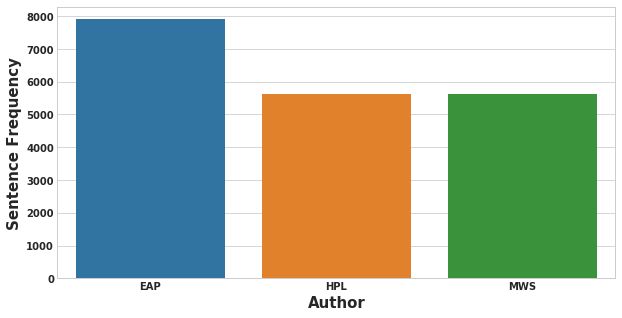

In [120]:
plt.figure(figsize=(10,5))
list_authors=list(df['author'].unique())
list_frequency=[len(df['author'][df['author']==list_authors[0]]),len(df['author'][df['author']==list_authors[1]]),len(df['author'][df['author']==list_authors[1]])]
sns.barplot(x=list_authors,y=list_frequency)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Sentence Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

 Frequency of each class(author )is almost similiar and we can treat this classification as a balanced problem.

** Length of Sentences **

In [121]:
df['Sentence_Length']=df['text'].apply(lambda x : len(x))

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text yticklabel objects>)

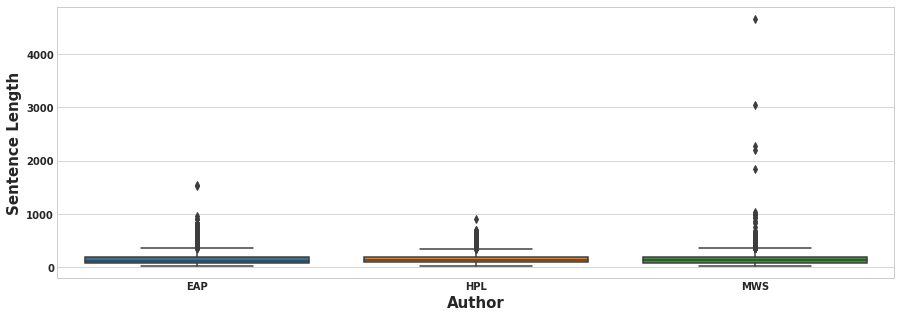

In [122]:
plt.figure(figsize=(15,5))
sns.boxplot(x="author",y="Sentence_Length",data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Sentence Length",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

There are some lengthier sentences for each of the authors and they are obfuscating the real sentence distributions. On the other hand MWS has quite a few sentences that are higher than 1000 words, so this information can be use ful.

** Exploring punctuation usage in sentences **

Common punctuation marks in english . Period(.),Comma(,),Exclamation mark(!),Question mark(?),Colon(:),Semicolon(;),Quotation mark("),Apostrophe('),Hyphen(-),Brackets((),[],{})

In [123]:
df['Period']=df['text'].str.count('\.')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text yticklabel objects>)

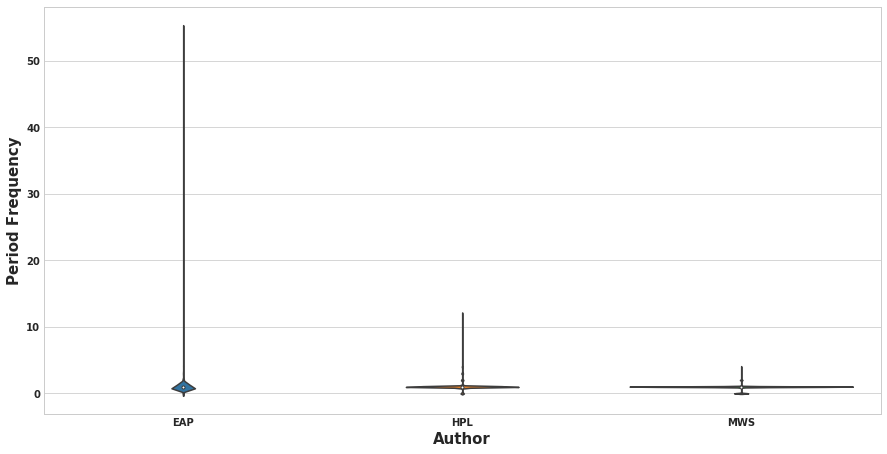

In [124]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Period',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Period Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

In [125]:
df['Comma']=df['text'].str.count(',')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text yticklabel objects>)

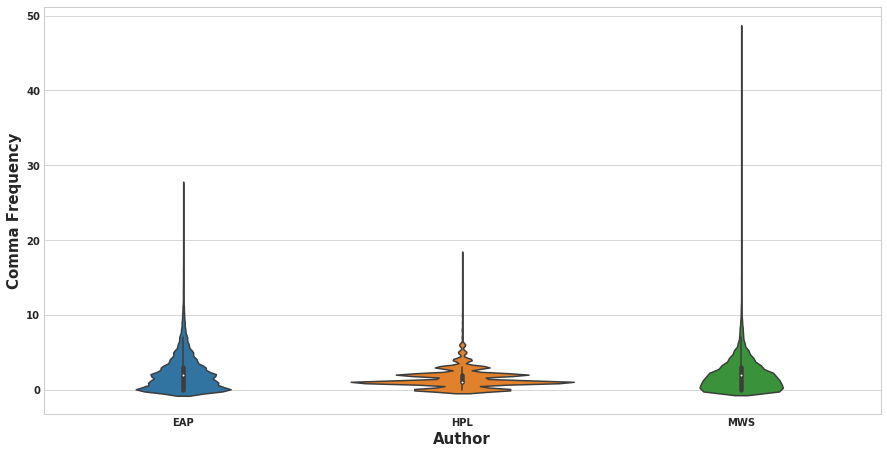

In [126]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Comma',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Comma Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

In [127]:
df[['Sentence_Length','Period','Comma']].corr()

,Sentence_Length,Period,Comma
Sentence_Length,1.000000,0.049302,0.648189
Period,0.049302,1.000000,0.066043
Comma,0.648189,0.066043,1.000000


In [128]:
df['Exclamation_Mark']=df['text'].str.count(r'/!')

In [129]:
df['Exclamation_Mark'].sum()

0

There are no exclamation marks in the data set.

In [130]:
df['Question_Marks']=df['text'].str.count(r'\?')

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 7 Text yticklabel objects>)

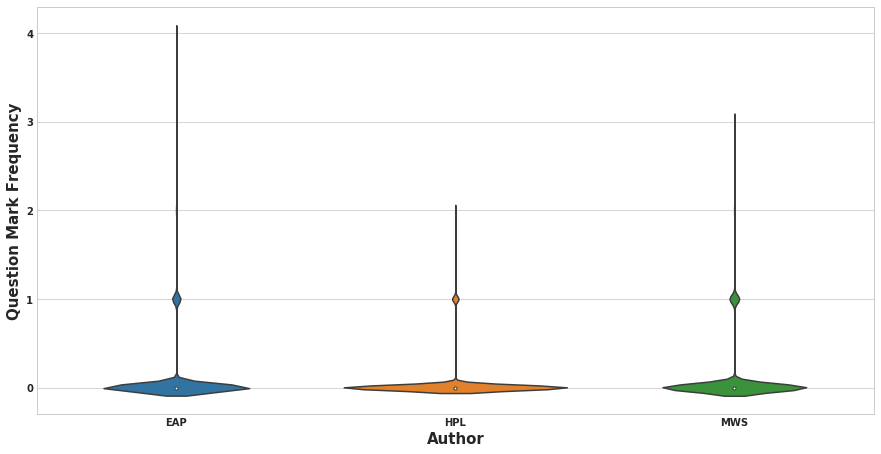

In [131]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Question_Marks',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Question Mark Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

Most of the sentences donot have question mark. This feature might not be very helpful in predicting the author, but we shall 
leave it for now and let the classifier do the feature selection during classification 

In [132]:
df['Colon']=df['text'].str.count(r':')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text yticklabel objects>)

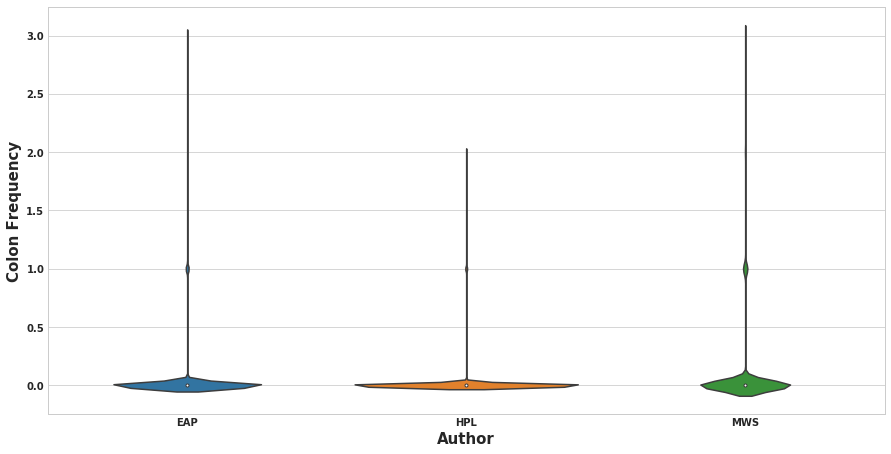

In [133]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Colon',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Colon Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

In [134]:
df['Semicolon']=df['text'].str.count(';')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text yticklabel objects>)

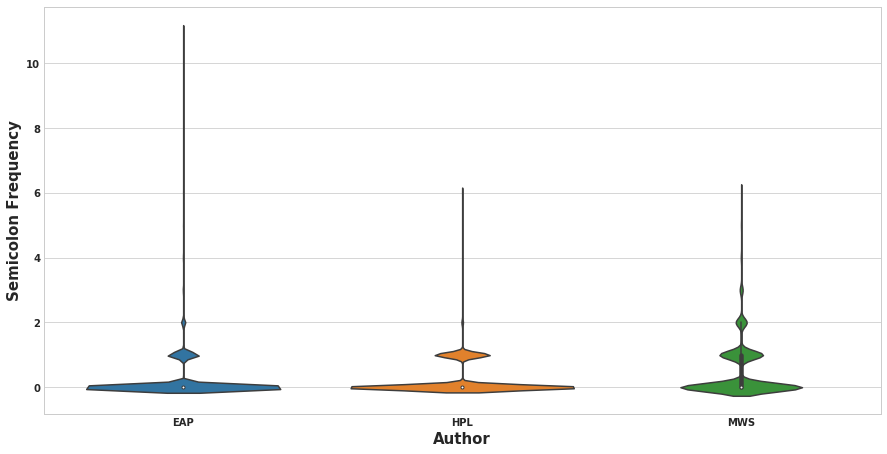

In [135]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Semicolon',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Semicolon Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

In [136]:
df['Quotation_Mark']=df['text'].str.count('"')

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text yticklabel objects>)

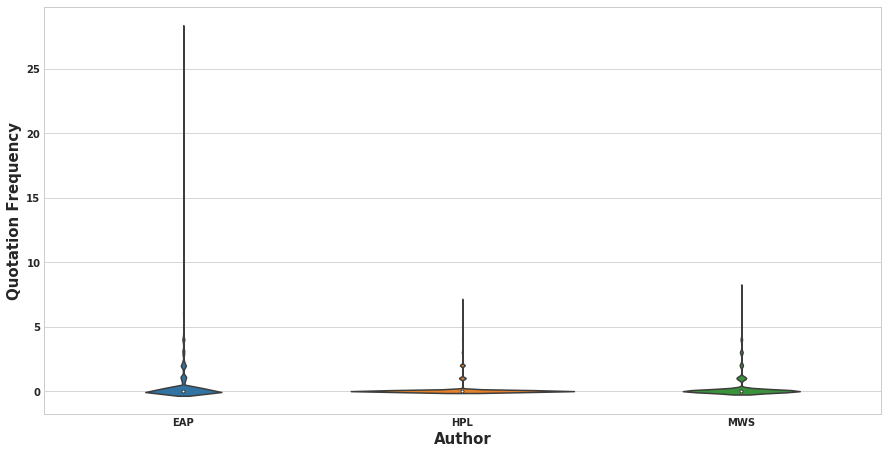

In [137]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Quotation_Mark',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Quotation Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

In [138]:
df['Aphostrophe']=df['text'].str.count("'")

In [139]:
df['Aphostrophe'].sum()

3520

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text yticklabel objects>)

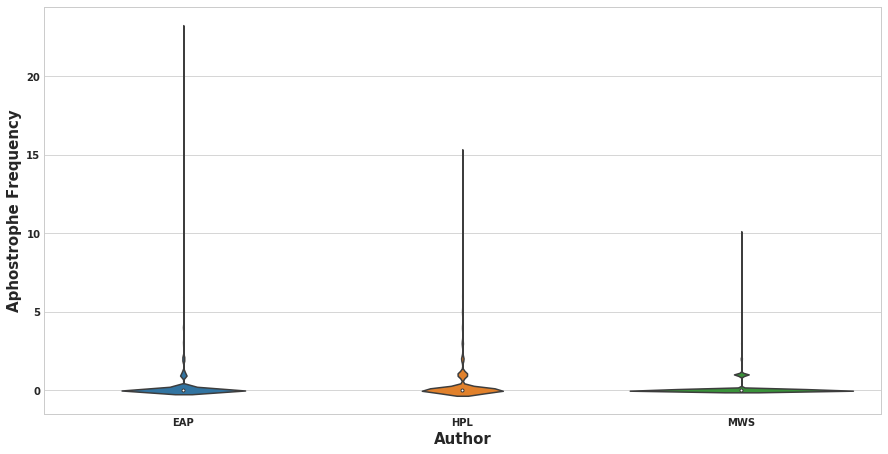

In [140]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Aphostrophe',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Aphostrophe Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

Other punctuation marks are not much prevelant in text, so ingnoring them for now.

** Frequency of capital letter words in sentences **

In [141]:
number_of_title_words=[]
for sentence in df['text']:
    doc=nlp(sentence)
    p=0
    for tokens in doc:
        if tokens.text.istitle() :
            p=p+1
    number_of_title_words.append(p)       

In [142]:
df['Title_Case_Words']=number_of_title_words

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text yticklabel objects>)

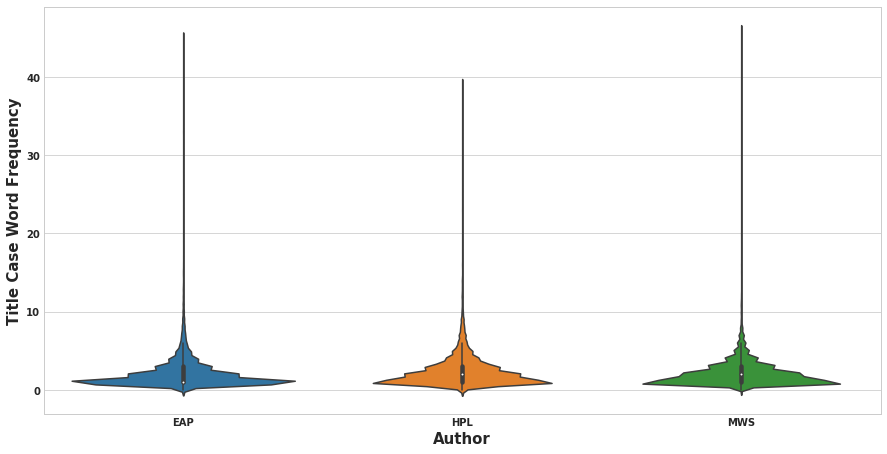

In [143]:
plt.figure(figsize=(15,7.5))
sns.violinplot(x='author',y='Title_Case_Words',data=df)
plt.xlabel("Author",fontsize=15,weight='bold')
plt.ylabel("Title Case Word Frequency",fontsize=15,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.yticks(fontsize=10,weight='bold')

**Word cloud exploration **

In [149]:
EAP_String="".join(list(df['text'][df['author']=='EAP']))
HPL_String="".join(list(df['text'][df['author']=='HPL']))
MWS_String="".join(list(df['text'][df['author']=='MWS']))

In [171]:
#EAP_informative_word
EAP_Informative_String= " ".join([ tokens.lemma_ for tokens in nlp(EAP_String) if ((tokens.pos_=='NOUN')|(tokens.pos_=='PNOUN'))])
HPL_Informative_String= " ".join([ tokens.lemma_ for tokens in nlp(HPL_String)  if ((tokens.pos_=='NOUN')|(tokens.pos_=='PNOUN'))])
MWS_Informative_String= " ".join([ tokens.lemma_  for tokens in nlp(MWS_String) if ((tokens.pos_=='NOUN')|(tokens.pos_=='PNOUN'))])

** EAP High frequency words **

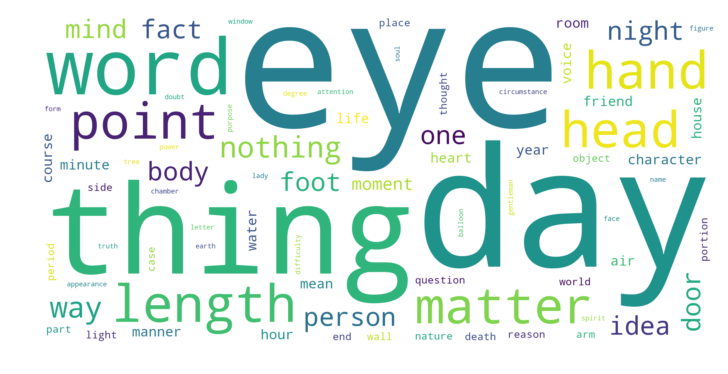

In [199]:
stopwords=set(STOPWORDS)
stopwords.add("man")
stopwords.add("time")
wc_EAP=WordCloud(width=400,height=200,max_words=1000,stopwords=stopwords,margin=10,random_state=42,background_color='white',scale=6).generate(EAP_Informative_String)
plt.figure(figsize=(10,5))
plt.imshow(wc_EAP,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

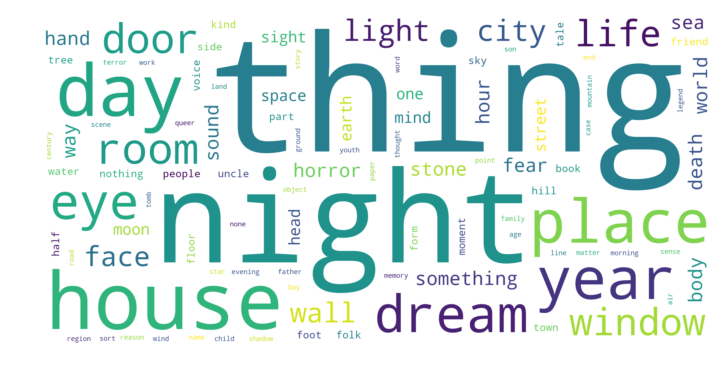

In [200]:
wc_HPL=WordCloud(width=400,height=200,max_words=1000,stopwords=stopwords,margin=10,random_state=42,background_color='white',scale=6).generate(HPL_Informative_String)
plt.figure(figsize=(10,5))
plt.imshow(wc_HPL,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

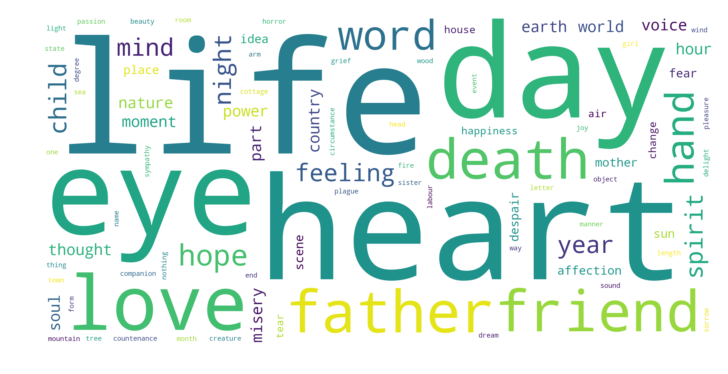

In [201]:
wc_MWS=WordCloud(width=400,height=200,max_words=1000,stopwords=stopwords,margin=10,random_state=42,background_color='white',scale=6).generate(MWS_Informative_String)
plt.figure(figsize=(10,5))
plt.imshow(wc_MWS,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()